 --- 
# UCI - Default from Credit Card Clients
---

# Dataset presentation

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

It can be found here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\nfor filename in filenames:\n    print(os.path.join(dirname, filename))\n"

# Useful imports

## Packages

In [3]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 120)

In [5]:
sns.set_style("darkgrid")

## Data Preparation imports

from sklearn.preprocessing import StandardScaler

## Model imports

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Metrics imports

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importing our Data easily!

In [6]:
path = 'UCI_Credit_Card.csv'

In [27]:
from dataprep.load import load_raw_data
from dataprep.load import load_data
from dataprep.load import load_data_xy


df = load_data(path)
X, y = load_data_xy(path)

# Splitting Train/test/val

## Stratified

# Feature Engineering

## Age Binning

In [28]:
from dataprep.feature_eng import bin_age

df = bin_age(df)

In [29]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s


## New category Gender x Marriage

In [30]:
from dataprep.feature_eng import gender_x_marriage

df = gender_x_marriage(df)

In [31]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)"
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)"
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)"
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)"
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)"


## New category Gender x Age

In [32]:
from dataprep.feature_eng import gender_x_agebin

df = gender_x_agebin(df)

In [33]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar,gen_ageBin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)","(2, 20s)"
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)","(2, 20s)"
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)","(2, 30s)"
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)","(2, 30s)"
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)","(1, 50s)"


## Let's add a linear Bill_amt0 prediction to our features

In [34]:
from dataprep.feature_eng import next_bill_amt
    
df = next_bill_amt(df)

In [35]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar,gen_ageBin,pred_bill_amt0
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)","(2, 20s)",3909.683795
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)","(2, 20s)",2678.148995
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)","(2, 30s)",29177.529785
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)","(2, 30s)",46995.038110
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)","(1, 50s)",8605.584386


# Preparing our data

## One-hot encoding our categorical data

In [36]:
df = pd.get_dummies(df, columns=['gender', 'education', 'marriage', 'gen_mar', 'gen_ageBin', 'age_bin'])

In [37]:
df.head()

,limit_bal,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pred_bill_amt0,gender_1,gender_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,"gen_mar_(1, 1)","gen_mar_(1, 2)","gen_mar_(1, 3)","gen_mar_(2, 1)","gen_mar_(2, 2)","gen_mar_(2, 3)","gen_ageBin_(1, '20s')","gen_ageBin_(1, '30s')","gen_ageBin_(1, '40s')","gen_ageBin_(1, '50s')","gen_ageBin_(1, '60+')","gen_ageBin_(2, '20s')","gen_ageBin_(2, '30s')","gen_ageBin_(2, '40s')","gen_ageBin_(2, '50s')","gen_ageBin_(2, '60+')",age_bin_20s,age_bin_30s,age_bin_40s,age_bin_50s,age_bin_60+
0,20000.0,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,3909.683795,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,120000.0,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2678.148995,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,29177.529785,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,46995.038110,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,50000.0,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,8605.584386,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Splitting test/train/val

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=6000, stratify=df.default, random_state=42)
df_train, df_test = train_test_split(df_train, test_size=6000, stratify=df_train.default, random_state=42)

## Splitting into (X,y)

In [43]:
from dataprep.load import df2xy

X_train, y_train = df2xy(df_train, 'default')
X_test, y_test = df2xy(df_test, 'default')
X_val, y_val = df2xy(df_val, 'default')

In [47]:
pd.concat([y_train,y_test, y_val], axis=1).describe()

,default,default,default
count,18000.000000,6000.000000,6000.000000
mean,0.221222,0.221167,0.221167
std,0.415081,0.415067,0.415067
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


It looks like our data is well stratified: the proportions of defaults in our 3 data sets are all ~22%

In [67]:
colonnes_dummies = list(X_train.columns)

## Normalizing our training data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [51]:
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

# Training our models

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)
log_reg.fit(X_train_norm, np.ravel(y_train))

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_train = log_reg.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = log_reg.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7720555555555556
recall:  0.5873932697137118
F1:  0.5327411456553922
--TEST--
accuracy:  0.772
recall:  0.5719668425018839
F1:  0.525987525987526


In [59]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.88      0.82      0.85     14018
     default       0.49      0.59      0.53      3982

    accuracy                           0.77     18000
   macro avg       0.68      0.71      0.69     18000
weighted avg       0.79      0.77      0.78     18000



In [60]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.83      0.85      4673
     default       0.49      0.57      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



### Which are our most important features?

In [116]:
print(log_reg.coef_)

[[-2.32278946e-01  5.64895451e-01  6.56883946e-02  1.42400872e-01
   1.06009074e-01  7.94765090e-02  1.14277127e-01 -2.56964706e-02
   3.83900659e-02  1.11602020e-01  7.29962386e-02  1.61440957e-02
  -1.11443708e-01 -1.32503030e-01 -1.69791682e-01  4.52516705e-03
  -2.49229460e-02 -2.68836286e-02 -3.53613522e-02 -2.54500030e-02
   1.11175062e-02 -1.11175062e-02  3.71651278e-03  2.97274120e-02
  -7.98987983e-03 -1.09443329e-01  1.99611205e-02 -2.01149401e-02
   8.87150931e-04  2.38543271e-02 -1.45042376e-02  3.55251854e-02
   2.03755972e-03 -8.69602438e-03 -2.65060972e-02 -5.89520955e-03
   1.92046120e-02  1.23667626e-02 -9.88239149e-03 -1.48819539e-02
  -1.58834304e-04 -2.04306445e-02 -6.96881389e-03  2.08197922e-02
   2.01003740e-02 -4.20849903e-03 -3.30776945e-03  3.21757124e-03
   8.59094966e-03  2.23613731e-03]]


In [117]:
coefs=np.array(log_reg.coef_[0])
abs_coefs = np.abs(coefs)

In [118]:
feature_importances_log = pd.DataFrame(list(zip(colonnes_dummies, coefs, abs_coefs)),
                                  columns=['Feature', 'Coef', 'Abs Coef'])

In [119]:
feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)

,Feature,Coef,Abs Coef
1,pay_1,0.564895,0.564895
0,limit_bal,-0.232279,0.232279
14,pay_amt2,-0.169792,0.169792
3,pay_3,0.142401,0.142401
13,pay_amt1,-0.132503,0.132503
6,pay_6,0.114277,0.114277
9,bill_amt3,0.111602,0.111602
12,bill_amt6,-0.111444,0.111444
25,education_4,-0.109443,0.109443
4,pay_4,0.106009,0.106009


Hence, it appears that our most important variables seem to be:

In [120]:
list(feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)['Feature'])[:9]

['pay_1',
 'limit_bal',
 'pay_amt2',
 'pay_3',
 'pay_amt1',
 'pay_6',
 'bill_amt3',
 'bill_amt6',
 'education_4']

We can note that they are the same as before we did our little feature engineering...
😅

## SVM

In [122]:
from sklearn.svm import SVC

svc_clf = SVC(gamma='auto', C=1, class_weight='balanced')
svc_clf.fit(X_train_norm, np.ravel(y_train))

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_pred_train = svc_clf.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = svc_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.773
recall:  0.6479156202913109
F1:  0.5580791693705386
--TEST--
accuracy:  0.7596666666666667
recall:  0.5855312735493594
F1:  0.5186915887850467


In [126]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.89      0.81      0.85     14018
     default       0.49      0.65      0.56      3982

    accuracy                           0.77     18000
   macro avg       0.69      0.73      0.70     18000
weighted avg       0.80      0.77      0.78     18000



In [127]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.81      0.84      4673
     default       0.47      0.59      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, 
                                 max_leaf_nodes=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [95]:
y_pred_train = tree_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = tree_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.809
recall:  0.4427423405323958
F1:  0.506318207926479
--TEST--
accuracy:  0.8068333333333333
recall:  0.43330821401657876
F1:  0.498051104374188


In [96]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.85      0.91      0.88     14018
     default       0.59      0.44      0.51      3982

    accuracy                           0.81     18000
   macro avg       0.72      0.68      0.69     18000
weighted avg       0.79      0.81      0.80     18000



In [97]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.85      0.91      0.88      4673
     default       0.59      0.43      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



Let's visualize our Decision Tree

In [98]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='tree_credit_default_featureEngineered.dot',
                feature_names=list(X_train.columns),
                class_names=['no-default', 'default'],
                rounded=True,
                filled=True
               )

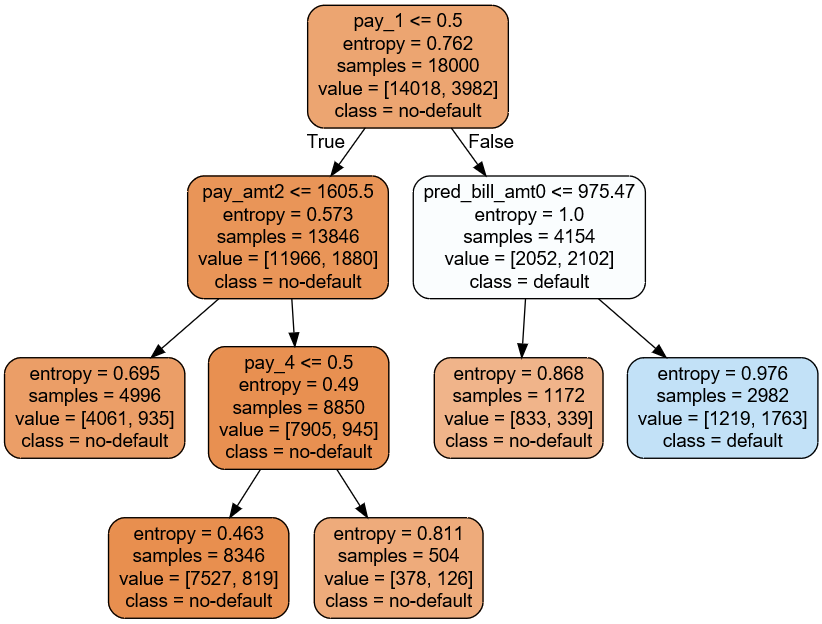

### Most important features

In [99]:
feature_importance_tree = pd.DataFrame(list(zip(X_train.columns, tree_clf.feature_importances_)), 
                   columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)

Hence, it appears that our most important variables seem to be:

In [100]:
list(feature_importance_tree.sort_values(by=['Importance'], ascending=False)['Feature'])[:9]

['pay_1',
 'pred_bill_amt0',
 'pay_amt2',
 'pay_4',
 'marriage_1',
 'education_3',
 'pay_2',
 'pay_3',
 'pay_5']

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs=-1)
rnd_clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [107]:
y_pred_train = rnd_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = rnd_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.8041111111111111
recall:  0.2345554997488699
F1:  0.346310715609937
--TEST--
accuracy:  0.8043333333333333
recall:  0.22532027128862095
F1:  0.33747178329571104


In [108]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.82      0.97      0.88     14018
     default       0.66      0.23      0.35      3982

    accuracy                           0.80     18000
   macro avg       0.74      0.60      0.62     18000
weighted avg       0.78      0.80      0.77     18000



In [109]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.81      0.97      0.89      4673
     default       0.67      0.23      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



### Feature importances

In [110]:
rnd_clf.feature_importances_

array([3.28316411e-02, 2.84256207e-01, 1.77979158e-01, 1.14330460e-01,
       8.66573658e-02, 8.13753905e-02, 5.74969429e-02, 1.37444990e-02,
       1.19820111e-02, 7.49516496e-03, 6.29838763e-03, 5.31602740e-03,
       5.67683464e-03, 3.52457550e-02, 1.87197409e-02, 1.63024570e-02,
       9.99572550e-03, 6.58430008e-03, 9.07806176e-03, 1.55945496e-02,
       1.31870544e-04, 7.13794077e-05, 8.23785827e-04, 2.23786852e-04,
       7.05198193e-05, 3.25921706e-04, 1.83311990e-05, 1.59428055e-04,
       0.00000000e+00, 7.23081560e-05, 0.00000000e+00, 1.53049762e-05,
       2.04009438e-05, 1.38623884e-04, 0.00000000e+00, 1.31472683e-05,
       3.75355900e-05, 2.53092121e-05, 4.37076320e-05, 0.00000000e+00,
       2.65917795e-05, 4.15976594e-04, 0.00000000e+00, 0.00000000e+00,
       1.99225326e-05, 0.00000000e+00, 2.61027466e-04, 3.14924627e-05,
       3.08994615e-05, 6.20498408e-05])

In [111]:
coefs=np.array(rnd_clf.feature_importances_)
abs_coefs = np.abs(coefs)

In [114]:
feature_importances_rf = pd.DataFrame(list(zip(colonnes_dummies, coefs, abs_coefs)),
                                  columns=['Feature', 'Coef', 'Abs Coef'])

In [115]:
feature_importances_rf.sort_values(by=['Abs Coef'], ascending=False)

,Feature,Coef,Abs Coef
1,pay_1,0.284256,0.284256
2,pay_2,0.177979,0.177979
3,pay_3,0.114330,0.114330
4,pay_4,0.086657,0.086657
5,pay_5,0.081375,0.081375
6,pay_6,0.057497,0.057497
13,pay_amt1,0.035246,0.035246
0,limit_bal,0.032832,0.032832
14,pay_amt2,0.018720,0.018720
15,pay_amt3,0.016302,0.016302


Hence, it appears that our most important variables seem to be:

In [121]:
list(feature_importances_rf.sort_values(by=['Abs Coef'], ascending=False)['Feature'])[:9]

['pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'pay_amt1',
 'limit_bal',
 'pay_amt2']

## Boostings models

### AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_norm, np.ravel(y_train))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [102]:
y_pred_train = ada_clf.predict(X_train_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = ada_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TEST--
accuracy:  0.8088333333333333
recall:  0.32169763937719736
F1:  0.42678660669665164
--TEST--
accuracy:  0.8055
recall:  0.306706857573474
F1:  0.41090358404846034


In [104]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.89     14018
     default       0.63      0.32      0.43      3982

    accuracy                           0.81     18000
   macro avg       0.73      0.63      0.66     18000
weighted avg       0.79      0.81      0.78     18000



In [103]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.88      4673
     default       0.62      0.31      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000

